In [83]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt

def keplers_third_law(period, M_bh, M_star):
    sep = (const.G * (M_star + M_bh)*period**2 / (4 * np.pi**2))**(1/3)
    return sep.to(u.AU)

def ellipsoidal_variation(phase, M_bh, M_star, inc, R_star, period):
    # time =[1, 2 , 10] * u.day
    # phase = [0, pi, 2pi]
    
    sep = keplers_third_law(M_bh=M_bh, M_star=M_star, period=period)
    
    ev = -np.cos(phase * 2)
    amplitude = M_bh * np.sin(inc) / M_star * (R_star / sep)**3 * np.sin(inc)
    return amplitude.decompose() * ev

def doppler_beaming(phase, period, inc, M_bh, M_star):
    amplitude = 2.8e-3 * np.sin(inc) * (period / (1 * u.day))**(-1/3)*((M_bh + M_star) / u.solMass)**(-2/3) * (M_bh / u.solMass) 
    db = np.sin(phase)
    return amplitude.decompose() * db

def self_lensing(phase, M_bh, M_star, R_star, period):
    sep = keplers_third_law(M_bh=M_bh, M_star=M_star, period=period)
    sig_duration = (R_star / (4 * sep)) * u.rad
    einstein_R = (4*(const.G * M_bh*sep) / const.c**2)**.5
    amplitude = np.repeat(2*(einstein_R/R_star)**2, len(phase))
    amplitude[(phase > 0.5 * sig_duration) & (phase < (2*np.pi*u.rad - 0.5 * sig_duration))] = 0
    return amplitude.decompose()

# Einstein radius as a variable inside function
# Orbital semi-major axis
# Equation 5 and 6

# convert time to phase
def tp_conversion(time, period):
    folded_time = (time % period)
    phase = ((folded_time / period) * 2 * np.pi).decompose() * u.rad
    return phase

def relative_flux(time, M_bh, inc, R_star, period, M_star):
    phase = tp_conversion(time, period)
    
    el_v = ellipsoidal_variation(phase = phase, M_bh = M_bh, M_star = M_star, inc = inc, R_star = R_star, period = period)
    dop_b = doppler_beaming(phase = phase, period = period, inc = inc, M_bh = M_bh, M_star = M_star)
    se_l = self_lensing(phase = phase, M_bh = M_bh, M_star = M_star, R_star = R_star, period = period)
    
    return (el_v + dop_b + se_l).decompose()


In [84]:
relative_flux(
    time = [1] * u.day, 
    M_bh = [1] * u.Msun, 
    inc = [np.pi /2] * u.rad,
    R_star = [1]* u.solRad, 
    period = [1] * u.day, 
    M_star = [1]* u.Msun
)

<Quantity [-0.00661895]>

In [49]:
#self_lensing(10 * u.Msun, 1 * u.Msun,1 * u.Rsun,3 * u.day)

In [50]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.7 * fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [51]:
# x_vals = np.linspace(0, 2 * np.pi, 1000)

# for M_bh in [5, 10, 8] * u.Msun:
    
#     y_vals = ellipsoidal_variation(phase=x_vals, M_bh=M_bh, M_star=600 * u.Msun, inc=np.pi/2, R_star=20 * u.Rsun, sep=6 * u.AU)
#     plt.plot(x_vals, y_vals, label=f"M_bh= {M_bh}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()



In [52]:
# x_vals = np.linspace(0, 2 * np.pi, 1000)

# for R_star in [2, 11, 9] * u.Rsun:
    
#     y_vals = ellipsoidal_variation(phase=x_vals, M_bh= 30 * u.Msun, M_star=600 * u.Msun, inc=np.pi/2, R_star=R_star, sep=6 * u.AU)
#     plt.plot(x_vals, y_vals, label=f"radius= {R_star}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()



In [53]:
# plt.figure(figsize=(20, 10))
# x_vals = np.linspace(0, 2 * np.pi, 1000)
# for M_bh in [5, 10] * u.Msun:
#     for R_star in [2, 11] * u.Rsun:
#         for inc in [1, 1.4]:
#             y_vals = ellipsoidal_variation(phase=x_vals, M_bh=M_bh, M_star=10 * u.Msun, inc=inc, R_star=R_star, sep=6 * u.AU)
#             plt.plot(x_vals, y_vals, label=f"R*= {R_star}, M_bh = {M_bh}, Inc = {inc}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()

In [54]:
# plt.figure(figsize=(20, 10))
# x_vals = np.linspace(0, 2 * np.pi, 1000)
# # for loop for radius and seperation.
# for R_star in [3, 7] * u.Rsun:
#     for sep in [10, 20] * u.AU:
#         y_vals = ellipsoidal_variation(phase=x_vals, M_bh= 60 * u.Msun, M_star=10 * u.Msun, inc=np.pi/2, R_star=R_star, sep=sep)
#         plt.plot(x_vals, y_vals, label=f"R*= {R_star}, Sep = {sep}")

# plt.legend()
# plt.xlabel("Orbital Phase")
# plt.ylabel("Relative Flux")
# plt.show()

# Relative flux seems to increase more the smaller the seperation

In [55]:
def keplers_third_law(period, M_bh, M_star):
    sep = (const.G * (M_star + M_bh)*period**2 / (4 * np.pi**2))**(1/3)
    return sep.to(u.AU)

period = 365 * u.day
M_star = 1 * const.M_earth
M_bh = 1 * u.solMass

print(keplers_third_law(M_bh=M_bh, M_star=M_star, period=period))

0.9995320549379735 AU


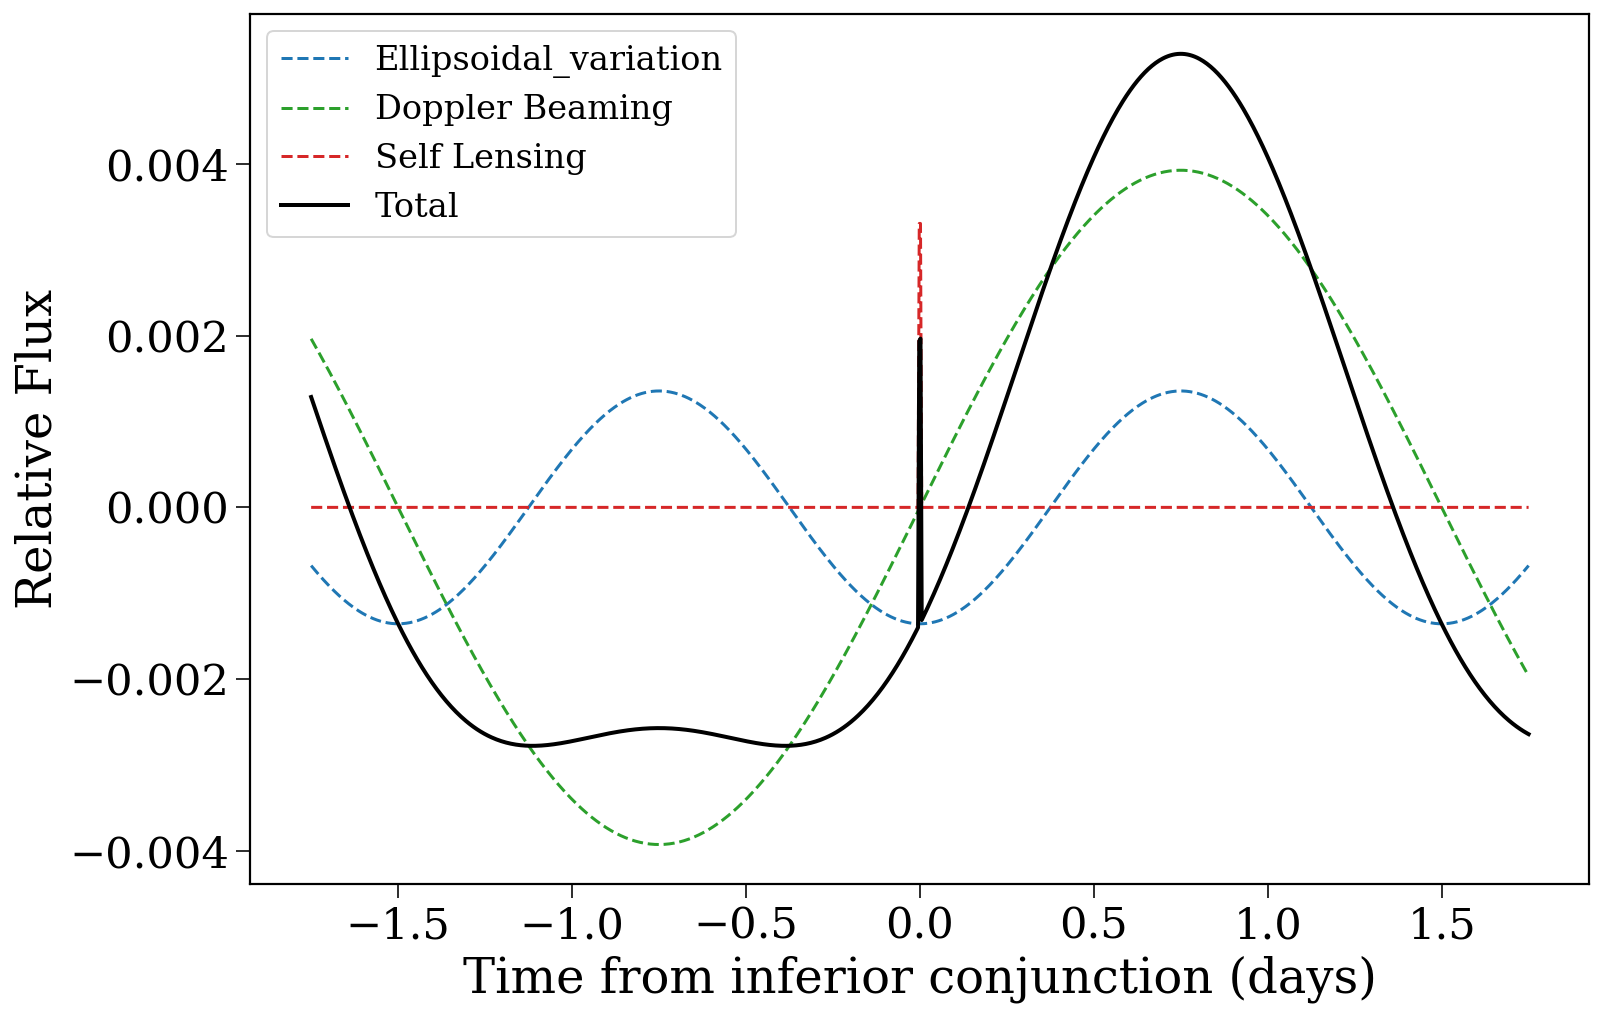

In [89]:
time_conj = np.linspace(-1.75, 1.75, 1000) * u.day
phase = tp_conversion(time_conj, 3 * u.day)

for M_bh in [10] * u.Msun:
    
    ev_vals = ellipsoidal_variation(phase=phase, M_bh=M_bh, M_star=1 * u.Msun, inc=np.pi/2, R_star=1 * u.Rsun, period = 3 * u.day)
    plt.plot(time_conj, ev_vals, label="Ellipsoidal_variation", color = 'tab:blue', linestyle ='dashed')
    db_vals = doppler_beaming(phase = phase, period = 3 * u.day, inc = np.pi/2, M_bh = M_bh , M_star = 1 * u.solMass)
    
    plt.plot(time_conj, db_vals, label="Doppler Beaming", color = 'tab:green', linestyle = 'dashed')
    sl_vals = self_lensing(phase, M_bh, 1 * u.Msun,1 * u.Rsun,3 * u.day)
    plt.plot(time_conj, sl_vals, label="Self Lensing", color = 'tab:red', linestyle = 'dashed')
    plt.plot(time_conj, 
             relative_flux(
                 time = time_conj,
                 M_bh = M_bh,
                 inc = np.pi/2,
                 R_star = [1] * u.Rsun,
                 period = [3] * u.day,
                 M_star = [1] * u.solMass
             ), 
             label="Total", color = 'black', linewidth = 2)
#phase, M_bh, inc, R_star, period, M_star
plt.legend()
plt.xlabel("Time from inferior conjunction (days)")
plt.ylabel("Relative Flux")
plt.show()


In [91]:
def plt_lensing(M_bh, M_star, inc, R_star, period, time, day_min, day_max):
    time_conj = np.linspace(day_min, day_max, 1000) * u.day
    phase = tp_conversion(time_conj, period)
    
    ev_vals = ellipsoidal_variation(
        phase=phase, 
        M_bh=M_bh, 
        M_star=M_star, 
        inc=inc, 
        R_star=R_star, 
        period = period
    )
    plt.plot(time_conj, ev_vals, label="Ellipsoidal_variation", color = 'tab:blue', linestyle ='dashed')
    db_vals = doppler_beaming(
        phase = phase, 
        period = period, 
        inc = inc, 
        M_bh = M_bh, 
        M_star = M_star
    )
    
    plt.plot(time_conj, db_vals, label="Doppler Beaming", color = 'tab:green', linestyle = 'dashed')
    sl_vals = self_lensing(
        phase = phase, 
        M_bh = M_bh, 
        M_star = M_star, 
        R_star = R_star, 
        period = period
    )
    plt.plot(time_conj, sl_vals, label="Self Lensing", color = 'tab:red', linestyle = 'dashed')
    plt.plot(time_conj, 
             relative_flux(
                 time = time_conj,
                 M_bh = M_bh,
                 inc = inc,
                 R_star = R_star,
                 period = period,
                 M_star = M_star
             ), 
             label="Total", color = 'black', linewidth = 2)

    #phase, M_bh, inc, R_star, period, M_star
    plt.legend()
    plt.xlabel("Time from inferior conjunction (days)")
    plt.ylabel("Relative Flux")
    plt.show()

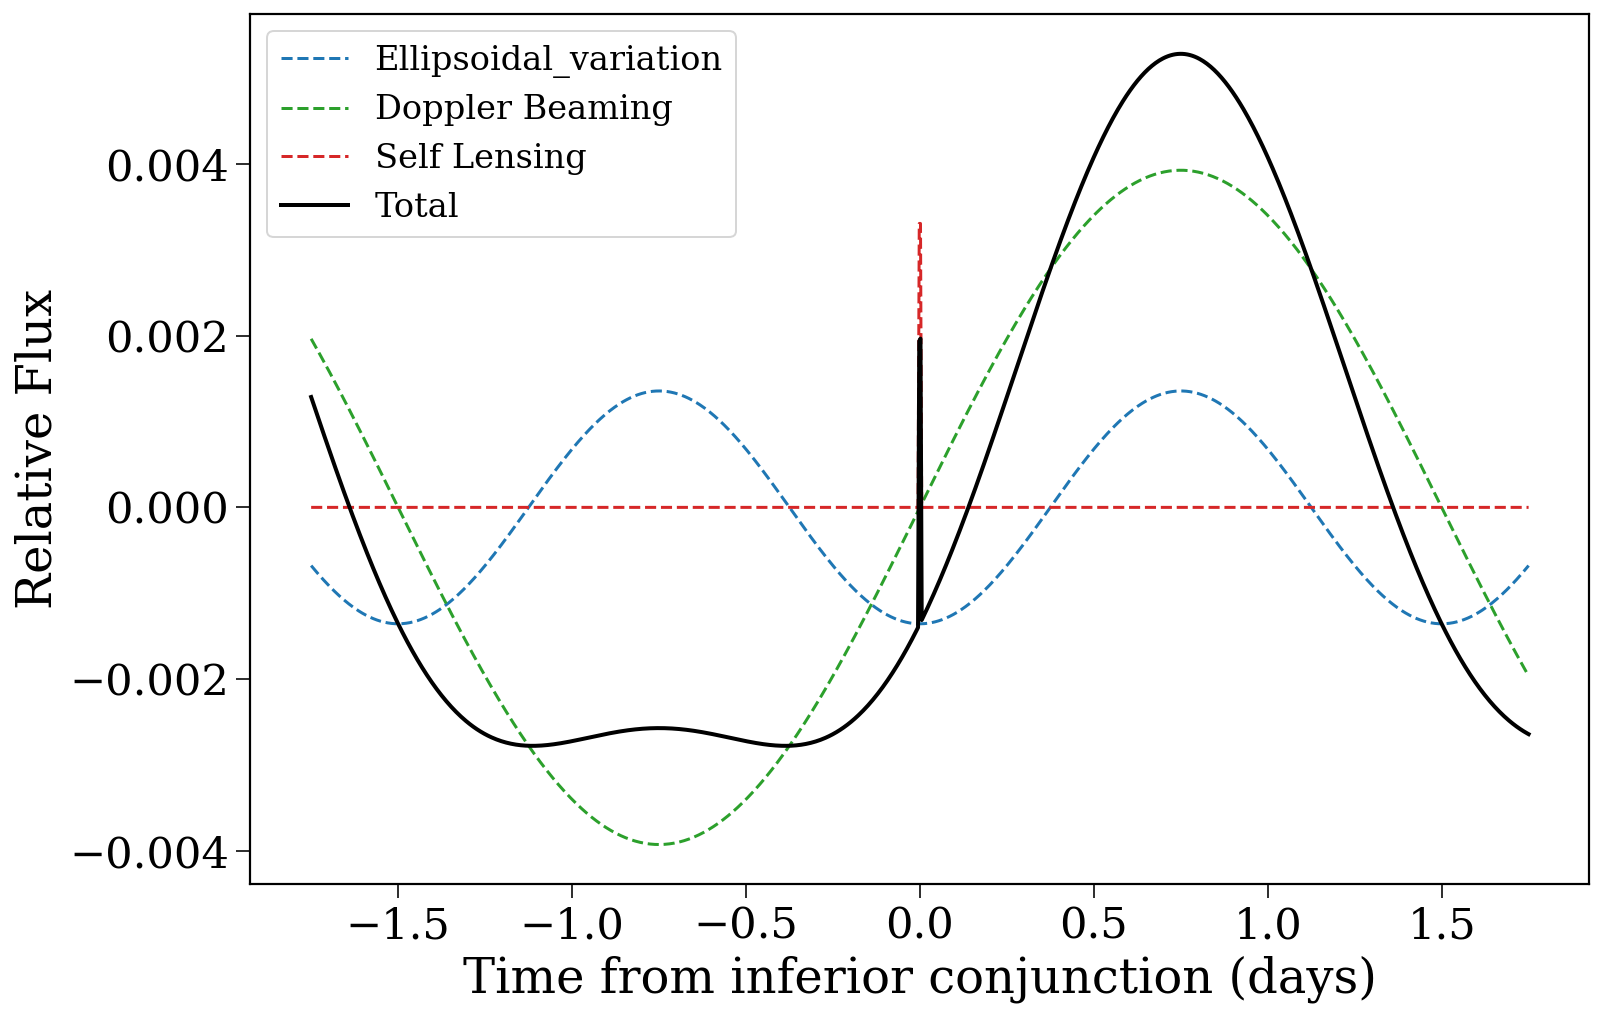

In [95]:
#plt_lensing(M_bh, M_star, inc, R_star, period, time, day_min, day_max)
plt_lensing(
    M_bh = 10 * u.Msun, 
    M_star = 1 * u.Msun, 
    inc = np.pi/2, 
    R_star = 1* u.Rsun, 
    period = 3 * u.day, 
    time = 1 * u.day, 
    day_min = -1.75, 
    day_max = 1.75
)


# friday: start using widgets, add sliders one by one and try